In [19]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [20]:
# Step 1: Load Data (Las Vegas)
df = pd.read_csv("Resources\lasvegaslistings.csv")  # Replace with actual Las Vegas dataset path

In [21]:
# Step 2: Data Cleaning (simplified example)
df = df[["price", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month"]]
df.dropna(inplace=True)
df = df[df["price"] != 0]
df = df[df["minimum_nights"] <= 30]

In [8]:
# Convert price from string to float if needed
df["price"] = df["price"].replace({'$':'', ',':''}, regex=True).astype(float)

In [9]:
# Step 3: Feature Engineering
df = pd.get_dummies(df, columns=["room_type"], drop_first=True)

In [10]:
# Step 4: Train/Test Split
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 5: Model 1 - Random Forest Regressor (default parameters)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
# Step 6: Model 2 - Linear Regression (baseline model)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [13]:
# Step 7: Evaluation
print("Random Forest Model:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Model:
MAE: 114.54045183253078
RMSE: 489.1162227909234
R2 Score: 0.005288665412875204


c:\Users\monic\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
print("\nLinear Regression Model:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Model:
MAE: 134.473974671722
RMSE: 483.0071441165535
R2 Score: 0.029981447972768027


c:\Users\monic\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Predictions')

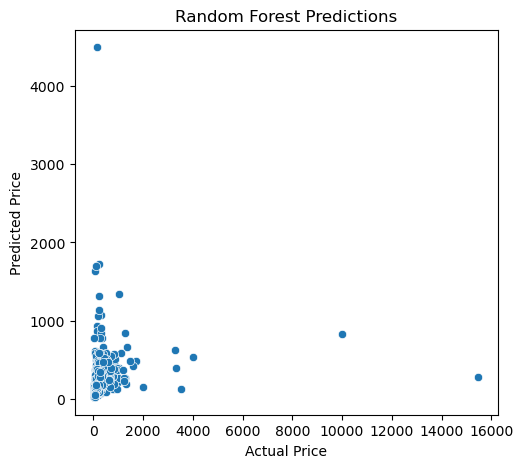

In [15]:
# Step 8: Visualizations
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Predictions")

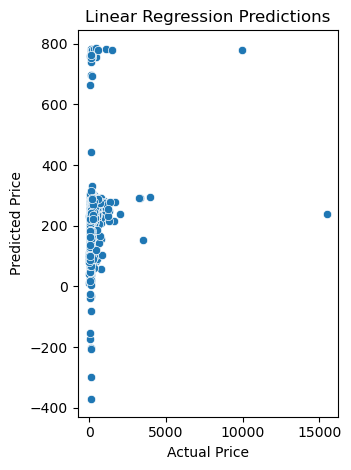

In [16]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression Predictions")
plt.tight_layout()
plt.show()

In [17]:
# Save predictions to CSV
predictions = pd.DataFrame({"Actual": y_test, "RF_Predicted": y_pred_rf, "LR_Predicted": y_pred_lr})
predictions.to_csv("las_vegas_price_model_comparison.csv", index=False)